<a href="https://colab.research.google.com/github/DSabarish/netflix_data_analysis/blob/main/Netflix_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries and Data Quality Stats Function**

In [261]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting pandas options to display all columns and rows when printing dataframes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# URL of the dataset to be read into a pandas dataframe
url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv"
df = pd.read_csv(url)

df.info()
# Observations from the dataframe information
# The dataset contains 8807 entries
# [date_added , release_year] need to be converted to datetime type


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [262]:
import pandas as pd

def data_quality_statistics(df):
    """
    This function takes a DataFrame as input and returns a DataFrame containing data quality statistics
    for each column in the DataFrame.

    Args:
      df: A Pandas DataFrame.

    Returns:
      A DataFrame containing data quality statistics for each column.
    """

    # Number of rows in the DataFrame
    num_rows = len(df)

    # List to store statistics for each column
    stats = []

    # Iterate over columns
    for col in df.columns:
        # Number of unique values
        num_unique = df[col].nunique()

        # Number of NaN values
        num_nan = df[col].isnull().sum()

        # Percentage of NaN values
        pct_nan = (num_nan / num_rows) * 100

        # Data type of the column
        data_type = df[col].dtype

        # Append statistics to the list
        stats.append({
            'Column': col,
            'Number of Rows': num_rows,
            'Number of Unique Values': num_unique,
            'Number of NaN': num_nan,
            'Percentage of NaN': round(pct_nan, 2),
            'Data Type': data_type,
            # Add more statistics here if needed
        })

    # Convert list of dictionaries to DataFrame
    stats_df = pd.DataFrame(stats)

    return stats_df

# Example usage:
data_quality_statistics(df)


,Column,Number of Rows,Number of Unique Values,Number of NaN,Percentage of NaN,Data Type
0,show_id,8807,8807,0,0.00,object
1,type,8807,2,0,0.00,object
2,title,8807,8807,0,0.00,object
3,director,8807,4528,2634,29.91,object
4,cast,8807,7692,825,9.37,object
5,country,8807,748,831,9.44,object
6,date_added,8807,1767,10,0.11,object
7,release_year,8807,74,0,0.00,int64
8,rating,8807,17,4,0.05,object
9,duration,8807,220,3,0.03,object


# **Basis Cleaning**

In [234]:


# Remove leading and trailing spaces, extract only the date part, and convert to datetime format
# df["date_added"] = (df["date_added"]
#                     .str.strip()
#                     .apply(pd.to_datetime)
#                     .dt.date
#                     .apply(pd.to_datetime)
#                     )
# df["date_added"].head(3)

# df["date_added"].describe()

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [235]:
# Define the URL from which to read the CSV file
url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv"
df = pd.read_csv(url)

# Remove leading and trailing spaces, extract only the date part, and convert to datetime format
df["date_added"] = (df["date_added"]
                    .str.strip()
                    .apply(pd.to_datetime)
                    .dt.date
                    .apply(pd.to_datetime)
                    )
# df["date_added"].head(3)

df["date_added"].describe()

count                             8797
mean     2019-05-17 05:59:08.436967168
min                2008-01-01 00:00:00
25%                2018-04-06 00:00:00
50%                2019-07-02 00:00:00
75%                2020-08-19 00:00:00
max                2021-09-25 00:00:00
Name: date_added, dtype: object

In [236]:
# Convert "release_year" column to datetime format with the middle of the year
df["release_year"] = pd.to_datetime(df["release_year"].astype(str) + '-07-01')
# df["release_year"].head(3)

df["release_year"].describe()


count                             8807
mean     2014-09-04 23:07:11.247870976
min                1925-07-01 00:00:00
25%                2013-07-01 00:00:00
50%                2017-07-01 00:00:00
75%                2019-07-01 00:00:00
max                2021-07-01 00:00:00
Name: release_year, dtype: object

In [237]:
df[df["release_year"] == df["release_year"].min()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,NaN,NaN,NaN,2018-12-30,1925-07-01,TV-14,1 Season,TV Shows,This collection restores films from women who ...


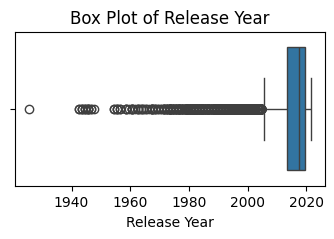

In [238]:
# Create the box plot
plt.figure(figsize=(4, 2))
sns.boxplot(x=df['release_year'])

# Add title and labels
plt.title('Box Plot of Release Year')
plt.xlabel('Release Year')

# Show the plot
plt.show()


# **1.1 Director**

In [239]:
# Create a copy of the DataFrame to work on
df_dir = df[["show_id", "title", "director"]].copy()
df_dir[:10]

# Specific check for the title "Scooby-Doo on Zombie Island"
df_dir[df_dir["title"] == "Scooby-Doo on Zombie Island"]

,show_id,title,director
7959,s7960,Scooby-Doo on Zombie Island,"Hiroshi Aoyama, Kazumi Fukushima, Jim Stenstrum"


In [240]:
# Function to replace 'nan' with pd.NA and split director names
def process_director(director):
    if isinstance(director, str) and director == 'nan':
        return [pd.NA]
    elif isinstance(director, str):
        return director.split(', ')
    else:
        return director  # If it's already a list or any other type

df_dir['director'] = df_dir['director'].apply(process_director)
exploded_dir_df = df_dir.explode('director').reset_index(drop=True)
exploded_dir_df[:10]

# Specific check for the title "Scooby-Doo on Zombie Island"
exploded_dir_df[exploded_dir_df['title'] == "Scooby-Doo on Zombie Island"]

,show_id,title,director
8657,s7960,Scooby-Doo on Zombie Island,Hiroshi Aoyama
8658,s7960,Scooby-Doo on Zombie Island,Kazumi Fukushima
8659,s7960,Scooby-Doo on Zombie Island,Jim Stenstrum


# **1.2 Cast**

In [241]:
# Create a copy of the DataFrame to work on
df_cast = df[["show_id", "title", "cast"]].copy()
df_cast[:10]

# Specific check for the title "Blood & Water"
df_cast[df_cast["title"] == "Blood & Water"]


,show_id,title,cast
1,s2,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban..."


In [242]:
# Function to replace 'nan' with pd.NA and split cast names
def process_cast(cast):
    if isinstance(cast, str) and cast == 'nan':
        return [pd.NA]
    elif isinstance(cast, str):
        return cast.split(', ')
    else:
        return cast  # If it's already a list or any other type

# Assuming df_cast is your DataFrame containing the 'cast' column
df_cast['cast'] = df_cast['cast'].apply(process_cast)
exploded_cast_df = df_cast.explode('cast').reset_index(drop=True)

# Specific check for the title "Blood & Water"
exploded_cast_df[exploded_cast_df['title'] == "Blood & Water"][:10]   #limiting to 10 rows


,show_id,title,cast
1,s2,Blood & Water,Ama Qamata
2,s2,Blood & Water,Khosi Ngema
3,s2,Blood & Water,Gail Mabalane
4,s2,Blood & Water,Thabang Molaba
5,s2,Blood & Water,Dillon Windvogel
6,s2,Blood & Water,Natasha Thahane
7,s2,Blood & Water,Arno Greeff
8,s2,Blood & Water,Xolile Tshabalala
9,s2,Blood & Water,Getmore Sithole
10,s2,Blood & Water,Cindy Mahlangu


# **1.3 Listed in**

In [243]:
# Create a copy of the DataFrame to work on
df_listed_in = df[["show_id", "title", "listed_in"]].copy()
df_listed_in[:10]

# Specific check for the title "Blood & Water"
df_listed_in[df_listed_in["title"] == "Blood & Water"]

,show_id,title,listed_in
1,s2,Blood & Water,"International TV Shows, TV Dramas, TV Mysteries"


In [244]:
# Function to replace 'nan' with pd.NA and split listed_in entries
def process_listed_in(listed_in):
    if isinstance(listed_in, str) and listed_in == 'nan':
        return [pd.NA]
    elif isinstance(listed_in, str):
        return listed_in.split(', ')
    else:
        return listed_in  # If it's already a list or any other type

# Assuming df_listed_in is your DataFrame containing the 'listed_in' column
df_listed_in['listed_in'] = df_listed_in['listed_in'].apply(process_listed_in)
exploded_listed_in_df = df_listed_in.explode('listed_in').reset_index(drop=True)

# Specific check for the title "Blood & Water"
exploded_listed_in_df[exploded_listed_in_df['title'] == "Blood & Water"]


,show_id,title,listed_in
1,s2,Blood & Water,International TV Shows
2,s2,Blood & Water,TV Dramas
3,s2,Blood & Water,TV Mysteries


# **1.4 Country**

In [245]:
# Create a copy of the DataFrame to work on
df_country = df[["show_id", "title", "country"]].copy()
df_country[:10]

# Specific check for the title "Yellowbird"
df_country[df_country["title"] == "Yellowbird"]

,show_id,title,country
8776,s8777,Yellowbird,"France, Belgium"


In [246]:
# Function to replace 'nan' with pd.NA and split country entries
def process_country(country):
    if isinstance(country, str) and country == 'nan':
        return [pd.NA]
    elif isinstance(country, str):
        return country.split(', ')
    else:
        return country  # If it's already a list or any other type

# Assuming df_country is your DataFrame containing the 'country' column
df_country['country'] = df_country['country'].apply(process_country)
exploded_country_df = df_country.explode('country').reset_index(drop=True)
exploded_country_df
# Specific check for the title "Yellowbird"
exploded_country_df[exploded_country_df['title'] == "Yellowbird"]


,show_id,title,country
10802,s8777,Yellowbird,France
10803,s8777,Yellowbird,Belgium


# **Merging the Unnested DataFrame**

In [255]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [266]:
# Perform chained merge operation
merged_df = (exploded_dir_df
             .merge(exploded_cast_df, on=['show_id', 'title'], how='inner')
             .merge(exploded_listed_in_df, on=['show_id', 'title'], how='inner')
             .merge(exploded_country_df, on=['show_id', 'title'], how='inner')
             .merge(df[['show_id', 'type', 'title', 'date_added', 'release_year', 'rating', 'duration', 'description']], on=['show_id', 'title'], how='inner')
            )

# Display the merged DataFrame
merged_df[:100]
len(merged_df)
print(merged_df.columns)

Index(['show_id', 'title', 'director', 'cast', 'listed_in', 'country', 'type',
       'date_added', 'release_year', 'rating', 'duration', 'description'],
      dtype='object')


In [267]:
data_quality_statistics(merged_df)

,Column,Number of Rows,Number of Unique Values,Number of NaN,Percentage of NaN,Data Type
0,show_id,201991,8807,0,0.00,object
1,title,201991,8807,0,0.00,object
2,director,201991,4993,50643,25.07,object
3,cast,201991,36439,2146,1.06,object
4,listed_in,201991,42,0,0.00,object
5,country,201991,127,11897,5.89,object
6,type,201991,2,0,0.00,object
7,date_added,201991,1767,158,0.08,object
8,release_year,201991,74,0,0.00,int64
9,rating,201991,17,67,0.03,object


In [249]:
# Import merged_df from pickle file
df_imported = pd.read_pickle('merged_df.pkl')


data_quality_statistics(df_imported)

# Now lets think how to immute the missing values Logically

#

FileNotFoundError: [Errno 2] No such file or directory: 'merged_df.pkl'

In [ ]:
import pandas as pd

director_mapping_data = df_imported[['director', 'cast', 'listed_in', 'country', 'type']].copy()

director_mapping_data.dropna(subset=['director', 'cast', 'listed_in', 'country', 'type'], inplace=True)

director_mapping_data.drop_duplicates(inplace=True)

director_mapping_data[:100]


In [ ]:
import pandas as pd

# Assuming df_imported and director_mapping_data are your DataFrames

# Calculate mode director for each combination of 'listed_in', 'country', and 'type'
mode_directors = director_mapping_data.groupby(['listed_in', 'country', 'type'])['director'].apply(lambda x: x.mode().iloc[0])

# Merge mode directors back to df_imported
df_imported['director_imputed'] = df_imported.merge(mode_directors, on=['listed_in', 'country', 'type'], how='left')['director_y']

# Fill missing director values with mode imputed values
df_imported['director_imputed'] = df_imported['director_imputed'].fillna(df_imported['director'])

# Drop unnecessary columns
df_imported.drop(['director'], axis=1, inplace=True)

# Rename director_imputed column to director
df_imported.rename(columns={'director_imputed': 'director'}, inplace=True)

# Display df_imported with imputed director values
df_imported[:100]

data_quality_statistics(df_imported)


In [ ]:
import pandas as pd

# Assuming df_imported and director_mapping_data are your DataFrames

# Calculate mode country for each combination of 'director', 'cast', 'listed_in', and 'type'
mode_countries = director_mapping_data.groupby(['director', 'cast', 'listed_in', 'type'])['country'].apply(lambda x: x.mode().iloc[0])

# Merge mode countries back to df_imported
df_imported['country_imputed'] = df_imported.merge(mode_countries, on=['director', 'cast', 'listed_in', 'type'], how='left')['country_y']

# Fill missing country values with mode imputed values
df_imported['country_imputed'] = df_imported['country_imputed'].fillna(df_imported['country'])

# Drop unnecessary columns
df_imported.drop(['country'], axis=1, inplace=True)

# Rename country_imputed column to country
df_imported.rename(columns={'country_imputed': 'country'}, inplace=True)

# Display df_imported with imputed country values
df_imported

data_quality_statistics(df_imported)


In [ ]:
missing_values = df_imported.isnull()
tidy = df.loc[~missing_values.any(axis=1)]
miss = df.loc[missing_values.any(axis=1)]

In [ ]:
# Filter the DataFrame to select rows with missing values in specified columns
filtered_df = df_imported[df_imported['director'].isna()
                          # | df_imported['cast'].isna()
                          # | df_imported['title'].isna()
                          | df_imported['country'].isna()
                          # | df_imported['listed_in'].isna()
                          ]

# Select the first 1000 rows from the filtered DataFrame
filtered_df[:1000]

# Save the filtered DataFrame to a CSV file
filtered_df.to_csv('missing_values.csv', index=False)


# **ABC**

In [ ]:
data_quality_statistics(df)

In [ ]:
missing_values = df.isnull()
tidy = df.loc[~missing_values.any(axis=1)]
miss = df.loc[missing_values.any(axis=1)]

In [ ]:
tidy.shape

In [ ]:
miss.shape

In [ ]:
missing_values = df.isnull()
tidy = df.loc[~missing_values.any(axis=1)]
miss = df.loc[missing_values.any(axis=1)]

print(tidy.shape[0]) # No NaN in any Rows
print(miss.shape[0]) # At least 1 NaN in all Rows

In [ ]:
data_quality_statistics(miss)

In [ ]:
# from the above "data_quality_statistics" we can obsere there are 225 unique coutries, which is leading to suspison.

url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv"
df = pd.read_csv(url)

df["country"].unique()[:100] #..Code(1)
# df["country"].value_counts() #..Code(2)

# we can see issues like
      # nan
      # 'United States' , 'United States, and United States'
      # Extra whitespace
      #  Some entries have multiple countries listed together separated by commas, example "Mexico, United States, Spain, Colombia" , "France, Senegal, Belgium" etc



In [ ]:
import pandas as pd

url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv"
df = pd.read_csv(url)

df["country"] = df["country"].fillna("").astype(str)
a=sorted(df["country"].unique())[:100]
print(len(df['country'].unique()))
# Split entries with multiple countries into separate rows
df['country'] = df['country'].str.split(', ')
df = df.explode('country')

# Clean up country names
# The 'explode' function splits entries with multiple countries into separate rows.
# For example, if a row originally had 'United States, Canada', it would become two rows,
# one with 'United States' and another with 'Canada'.
# The 'split' function splits the string on commas, creating a list of countries.
# Then, 'explode' converts each item in the list into a separate row.
# This is necessary because each row should represent only one country.

# The following lines would strip leading and trailing whitespaces from country names.
# However, it seems that the data already has clean country names, so this step is unnecessary.
# df['country'] = df['country'].str.strip()

# Now, let's get the unique country names
# print(len(df['country'].unique()))

# df["country"] = df["country"].fillna("").astype(str)
# sorted(df["country"].unique())[:100]
# df["country"].value_counts() #..Code(2)\
# df["country"].isna()
a[:10]

In [ ]:
df.show_id.nunique()

In [ ]:
# Country Specific Type --->
# Country Specific Listed-in (Genre) --->
# Evolution of kind of Movies/TV Series Change ---> rank fo each movie/tv-series change w.r.t release_year --->
# Evolution of duration of Movies Series Change --->
# In which month the movies are released, and it going well ---> Trend Analysis. --->
# Most Casted Actor   --->
# Productive Director --->  no, of movies/ range of timeframe
#
Cast = Actor



In [ ]:
url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv"
df = pd.read_csv(url)


mask = (df["director"].isna() & df["country"].isna())
df[mask].shape

In [ ]:
mask = (df["cast"].isna() & df["country"].isna())
df[mask].shape

In [ ]:
mask = (df["cast"].isna() & df["director"].isna() & df["country"].isna())
df[mask].shape

# observation 96 rows have - unfillable rows

In [ ]:
96/8807*100


In [ ]:
#  0   show_id       8807 non-null   object
#  1   type          8807 non-null   object
#  2   title         8807 non-null   object
#  3   director      6173 non-null   object
#  4   cast          7982 non-null   object
#  5   country       7976 non-null   object
#  6   date_added    8797 non-null   object
#  7   release_year  8807 non-null   int64
#  8   rating        8803 non-null   object
#  9   duration      8804 non-null   object
#  10  listed_in     8807 non-null   object
#  11  description   8807 non-null   object

df['director'] = (df['director']
                  .replace('nan', pd.NA)
                  .apply(lambda x: str(x).split(', ') if pd.notna(x) else [pd.NA])
                  )

# Explode the DataFrame to separate each director into its own row
unnested_dir_df = (df[["show_id","title","director"]]
                   .explode('director')
                   .reset_index(drop=True)
                   )


In [ ]:
url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv"
df = pd.read_csv(url)

mask = (df["cast"].isna()
          & df["director"].isna()
          & df["country"].isna()
          & df["listed_in"].isna())

df[mask].shape


# observation 0 rows have

In [ ]:
url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv"
df = pd.read_csv(url)

df['listed_in'] = (df['listed_in']
                  .replace('nan', pd.NA)
                  .apply(lambda x: str(x).split(', ') if pd.notna(x) else [pd.NA])
                  )

newdf=df[["director","listed_in","country"]][df["director"].isna()]

newdf.explode("listed_in")[:20]






In [ ]:
url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv"
df = pd.read_csv(url)

df['listed_in'] = (df['listed_in']
                  .replace('nan', pd.NA)
                  .apply(lambda x: str(x).split(', ') if pd.notna(x) else [pd.NA])
                  )

comb_df = (df[["show_id","director","country","listed_in"]]
                   .explode('listed_in')
                   .reset_index(drop=True)
                   )
# Romantic TV Shows	India
# 8740	NaN	British TV Shows	United Kingdom
mask2 = ((comb_df["listed_in"] == "Romantic TV") & (comb_df["country"] == "India") & (~comb_df["director"].isna()))
comb_df[mask2].value_counts()

In [ ]:
# checking that "NAN" 96 rows


url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv"
df = pd.read_csv(url)

mask3 = (df["cast"].isna() & df["director"].isna() & df["country"].isna())
df[mask3][:5]


# df[mask3].shape

In [ ]:
url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv"
df = pd.read_csv(url)

# df[["director","country"]][~df.director.isna() & df.country.isna()][:10]

# count_df = (df
#             .groupby(["director", "country"])
#             .size()
#             .reset_index(name='count'))

# count_df


# ---

count_df = (df
            .groupby(["director", "country"]) #.size()
            ).value_counts()

# count_df
# dir_country_main = count_df.loc[count_df.groupby('director')['count'].idxmax()].reset_index(drop=True)
# dir_country_main[:2]

In [ ]:
url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv"
df = pd.read_csv(url)

# from : dir_country_main
# to : df

filled_director_df = pd.merge(df,
                              dir_country_main,
                              on = "director",
                              how = "left" )

filled_director_df = filled_director_df.drop("country_x", axis = 1)
filled_director_df[:10]

filled_director_df[["director", "country_y"]][df["country"].isna()]


In [ ]:
url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv"
df = pd.read_csv(url)

df['listed_in'] = (df['listed_in']
                  .replace('nan', pd.NA)
                  .apply(lambda x: str(x).split(', ') if pd.notna(x) else [pd.NA])
                  )

comb_df = (df[["show_id","director","country","listed_in"]]
                   .explode('listed_in')
                   .reset_index(drop=True)
                  )
